# PLANT DISEASE DETECTION

## Using the Convolutional Neural NetWorks

#Installing Required Packages

In [ ]:
!pip install tensorflow==2.9.1
import tensorflow as tf


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/














































In [ ]:
print(tf.__version__)

2.9.1


#Downloading the Dataset

In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


















In [ ]:
#we are downloading the dataset from kaggle

import opendatasets as od

dataset_url='https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset'

od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds

Your Kaggle username: jeevanathanv

Your Kaggle Key: ··········



100%|██████████| 2.70G/2.70G [02:02<00:00, 23.7MB/s]


In [ ]:
import os

print('Training Folder')
for dirpath,filename,dirname in os.walk('/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'):
  print(f'There are {len(filename)} directories,{len(dirname)} images in {dirpath}')

Training Folder

There are 38 directories,0 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train

There are 0 directories,1907 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___Common_rust_

There are 0 directories,1745 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Septoria_leaf_spot

There are 0 directories,1961 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus

There are 0 directories,1774 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Strawberry___Leaf_scorch

There are 0 directories,1926 images in /content/new-plant-diseases-dataset/

In [ ]:
print('Testing Folder')
for dirpath,filename,dirname in os.walk('/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'):
  print(f'There are {len(filename)} directories,{len(dirname)} images in {dirpath}')

Testing Folder

There are 38 directories,0 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid

There are 0 directories,477 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Corn_(maize)___Common_rust_

There are 0 directories,436 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Tomato___Septoria_leaf_spot

There are 0 directories,490 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Tomato___Tomato_Yellow_Leaf_Curl_Virus

There are 0 directories,444 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___Leaf_scorch

There are 0 directories,481 images in /content/new-plant-diseases-dataset/New Pl

## Dataset image description

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dir = '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
test_dir = '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

train_data = image_dataset_from_directory(train_dir,
                                             image_size=(224,224),
                                             label_mode='categorical',
                                             batch_size=32)

test_data = image_dataset_from_directory(test_dir,
                                         image_size=(224,224),
                                         label_mode='categorical',
                                         batch_size=32)

Found 70295 files belonging to 38 classes.

Found 17572 files belonging to 38 classes.


In [ ]:
train_data,test_data

(<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>,
 <BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>)

## Class Names

In [ ]:
class_names = train_data.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

# Visual Report Of data

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
def get_random_image(directory,class_names=class_names):
  rn = random.randint(0,len(class_names)-1)
  choice = random.choice(os.listdir(os.path.join(directory,class_names[rn])))
  img_path= os.path.join(directory,class_names[rn],choice)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  fontsize=10
  plt.title(class_names[rn],fontdict={'fontsize': fontsize})
  plt.axis(False)

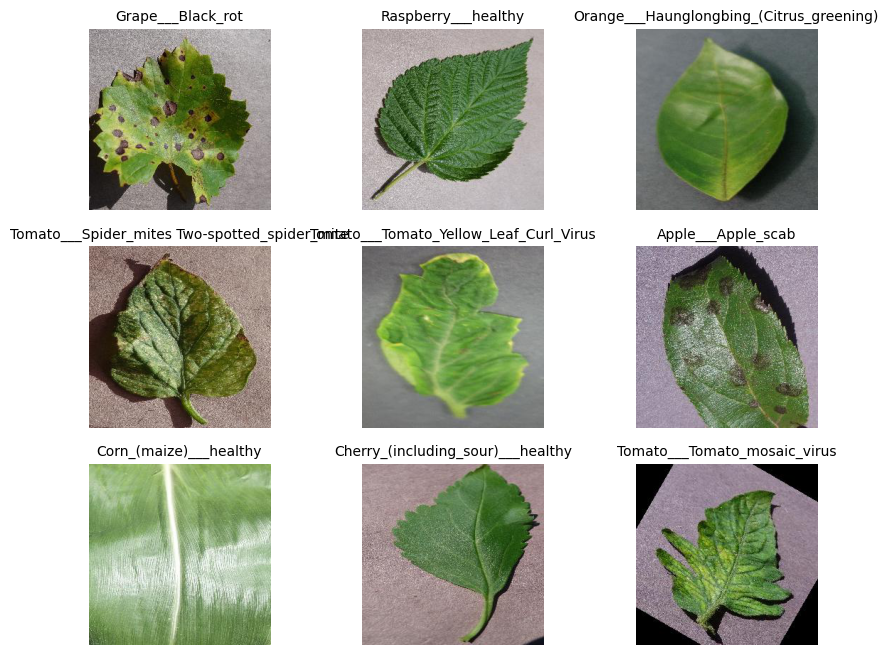

In [ ]:
plt.figure(figsize=(10,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  get_random_image(train_dir)

# Applying Model EfficientNETB0

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

image_shape = (224,224,3)

base_model = tf.keras.applications.EfficientNetB0(include_top=False,)
base_model.trainable = False

inputs =  layers.Input(shape = image_shape,name='input_layer')

x = base_model(inputs)

x = layers.GlobalAveragePooling2D(name='GlobalAveragePooling2D_layer')(x)

outputs = layers.Dense(38,activation='softmax',name='output_layer')(x)

feature_model = tf.keras.Model(inputs,outputs,name='plant_disease_model')


In [ ]:
base_model.trainable = True

for layer in base_model.layers[:-20]:
  layer.trainable = False

feature_model.compile(loss='categorical_crossentropy',
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=['accuracy'])

## Summary Of the Model

In [ ]:
base_model.summary()

Model: "efficientnetb0"

__________________________________________________________________________________________________

 Layer (type)                   Output Shape         Param #     Connected to                     


 input_2 (InputLayer)           [(None, None, None,  0           []                               

                                 3)]                                                              

                                                                                                  

 rescaling_1 (Rescaling)        (None, None, None,   0           ['input_2[0][0]']                

                                3)                                                                

                                                                                                  

 normalization_1 (Normalization  (None, None, None,   7          ['rescaling_1[0][0]']            

 )                              3)                                        

#Features Description Model

In [ ]:
feature_model.summary()

Model: "plant_disease_model"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         

                                                                 

 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  

                                                                 

 GlobalAveragePooling2D_laye  (None, 1280)             0         

 r (GlobalAveragePooling2D)                                      

                                                                 

 output_layer (Dense)        (None, 38)                48678     

                                                                 


Total params: 4,098,249

Trainable params: 1,399,638

Non-trainable params: 2,698,611

_________________________________________________________________


# Log handling

In [ ]:
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

# Running 100 Epochs and apply Early Stopping into it

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                  patience=3)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                 factor=0.2,
                                                 patience=2,
                                                 verbose=1,
                                                 min_lr=1e-7)

checkpoint_path = "fine_tune_checkpoints/"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      save_weights_only=True,
                                                      save_best_only=True,
                                                      monitor="val_loss")


# Model Converge their value after 20 epochs and early stop of our model

In [ ]:
initial_epochs = 100

history1 = feature_model.fit(train_data,epochs=initial_epochs,
                  steps_per_epoch=len(train_data),
                  validation_data=test_data,
                  validation_steps=len(test_data),
                  callbacks=[early_stopping,
                             model_checkpoint,
                             reduce_lr,
                             create_tensorboard_callback('plant_disease_model',
                                                         'EfficientNetB010')])

Saving TensorBoard log files to: plant_disease_model/EfficientNetB010/20230401-180404

Epoch 1/100

2197/2197 [==============================] - 222s 94ms/step - loss: 0.1378 - accuracy: 0.9594 - val_loss: 0.0388 - val_accuracy: 0.9876 - lr: 0.0010

Epoch 2/100

2197/2197 [==============================] - 204s 93ms/step - loss: 0.0434 - accuracy: 0.9859 - val_loss: 0.0636 - val_accuracy: 0.9807 - lr: 0.0010

Epoch 3/100

2197/2197 [==============================] - 203s 92ms/step - loss: 0.0311 - accuracy: 0.9894 - val_loss: 0.0275 - val_accuracy: 0.9899 - lr: 0.0010

Epoch 4/100

2197/2197 [==============================] - 207s 94ms/step - loss: 0.0245 - accuracy: 0.9918 - val_loss: 0.0279 - val_accuracy: 0.9910 - lr: 0.0010

Epoch 5/100

2197/2197 [==============================] - ETA: 0s - loss: 0.0218 - accuracy: 0.9930

Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

2197/2197 [==============================] - 202s 92ms/step - loss: 0.0218 - accur

In [ ]:
feature_model.load_weights(checkpoint_path)

## Test Accuracy of This Model is around 99.85%

In [ ]:
feature_model.evaluate(test_data)

550/550 [==============================] - 39s 70ms/step - loss: 0.0069 - accuracy: 0.9986


[0.006897420156747103, 0.9985772967338562]

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = history1.epoch

  acc = history.history['accuracy']
  val_acc =history.history['val_accuracy']

  plt.figure(figsize=(8,10))
  plt.subplot(2,1,1)
  plt.plot(epochs,loss)
  plt.plot(epochs,val_loss)
  plt.title('Training_loss vs Validation_loss')

  plt.subplot(2,1,2)
  plt.plot(epochs,acc)
  plt.plot(epochs,val_acc)
  plt.title('Training_accuracy vs Validation_accuracy')

## Graphs Drawing into it

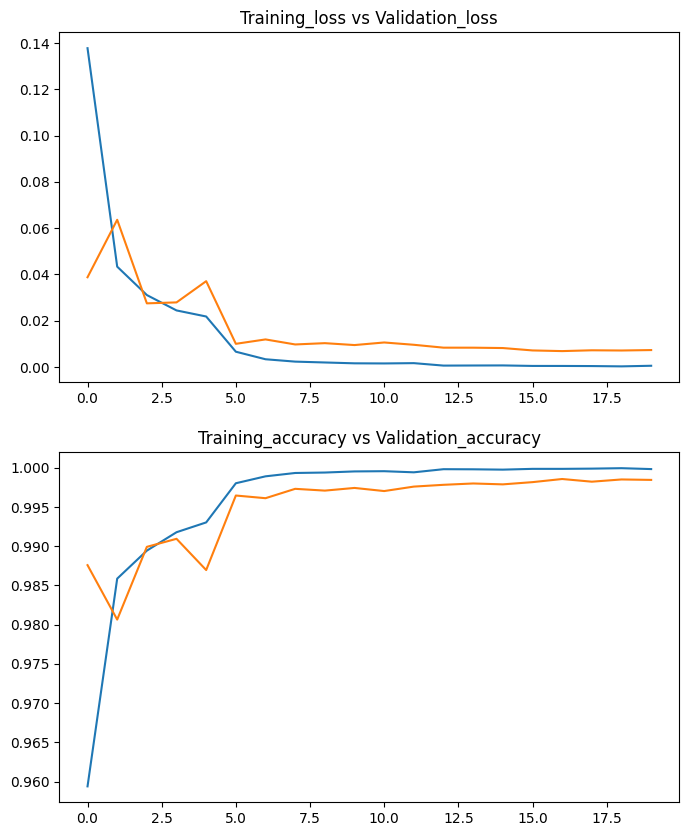

In [ ]:
plot_history(history1)

In [ ]:
feature_model.save('trained_plant_disease_model.keras')

After Doing Only Prediction pipeline into it

In [ ]:
def load_prep(img_path):
  img = tf.io.read_file(img_path)

  img = tf.image.decode_image(img)

  img = tf.image.resize(img,size=(224,224))

  return img

Text(0.5, 0.98, '(224, 224, 3)')

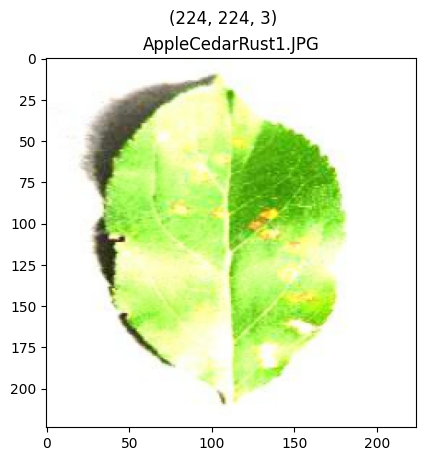

In [ ]:
image = load_prep('/content/new-plant-diseases-dataset/test/test/AppleCedarRust1.JPG')
plt.imshow(image/255.)
plt.title('AppleCedarRust1.JPG')
plt.suptitle(image.shape)

# Predcition Model and this model is Used for UI Creation

In [ ]:
pred = feature_model.predict(tf.expand_dims(image,axis=0))
pred


1/1 [==============================] - 3s 3s/step


array([[2.12591636e-13, 1.34409585e-14, 1.00000000e+00, 4.89997379e-22,
        3.75979903e-19, 3.77038197e-20, 1.82549262e-20, 5.44252118e-19,
        1.56762465e-16, 2.98601744e-23, 3.01819126e-27, 2.77139265e-19,
        7.38642043e-19, 1.22388361e-17, 5.37208003e-19, 3.54502671e-21,
        1.57714740e-19, 5.91911544e-22, 6.42053260e-22, 7.23124202e-26,
        9.09810657e-20, 4.96236827e-22, 2.41205956e-24, 8.61224265e-19,
        1.00854999e-24, 1.85473150e-24, 4.44573261e-20, 3.88141555e-25,
        3.17946316e-21, 2.76580556e-19, 1.25531306e-18, 1.71925706e-24,
        2.11805871e-22, 1.81800160e-27, 9.46556175e-18, 9.49873332e-25,
        2.29724962e-19, 2.42363471e-24]], dtype=float32)

In [ ]:
predicted_value = class_names[pred.argmax()]
predicted_value

'Apple___Cedar_apple_rust'

In [ ]:
class_names = test_data.class_names

def random_image_predict(model,test_dir=test_dir,class_names=class_names,rand_class=True,cls_name=None):
  if rand_class==True:
    ran_cls = random.randint(0,len(class_names))
    cls = class_names[ran_cls]
    ran_path = test_dir +'/'+ cls+ '/'+ random.choice(os.listdir(test_dir+'/'+cls))
  else:
    cls = class_names[cls_name]
    ran_path = test_dir +'/'+ cls + '/'+ random.choice(os.listdir(test_dir+'/'+cls))

  prep_img = load_prep(ran_path)

  pred = model.predict(tf.expand_dims(prep_img,axis=0))
  pred_cls = class_names[pred[0].argmax()]
  pred_percent = pred[0][pred[0].argmax()]*100
  plt.imshow(prep_img/255.)
  if pred_cls == cls:
    c = 'g'
  else:
    c = 'r'
  plt.title(f'actual:{cls},\npred:{pred_cls},\nprob:{pred_percent:.2f}%',color = c ,fontdict={'fontsize':10})
  plt.axis(False)

1/1 [==============================] - 0s 43ms/step


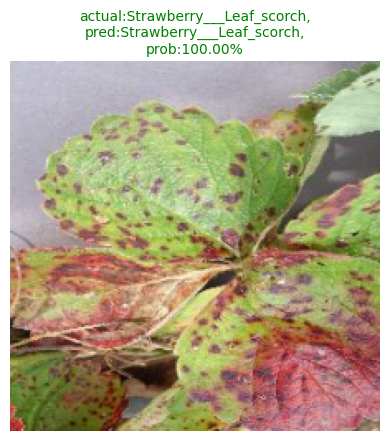

In [ ]:
random_image_predict(feature_model)

1/1 [==============================] - 0s 52ms/step

1/1 [==============================] - 0s 40ms/step

1/1 [==============================] - 0s 41ms/step

1/1 [==============================] - 0s 44ms/step

1/1 [==============================] - 0s 44ms/step

1/1 [==============================] - 0s 43ms/step

1/1 [==============================] - 0s 44ms/step

1/1 [==============================] - 0s 41ms/step

1/1 [==============================] - 0s 44ms/step


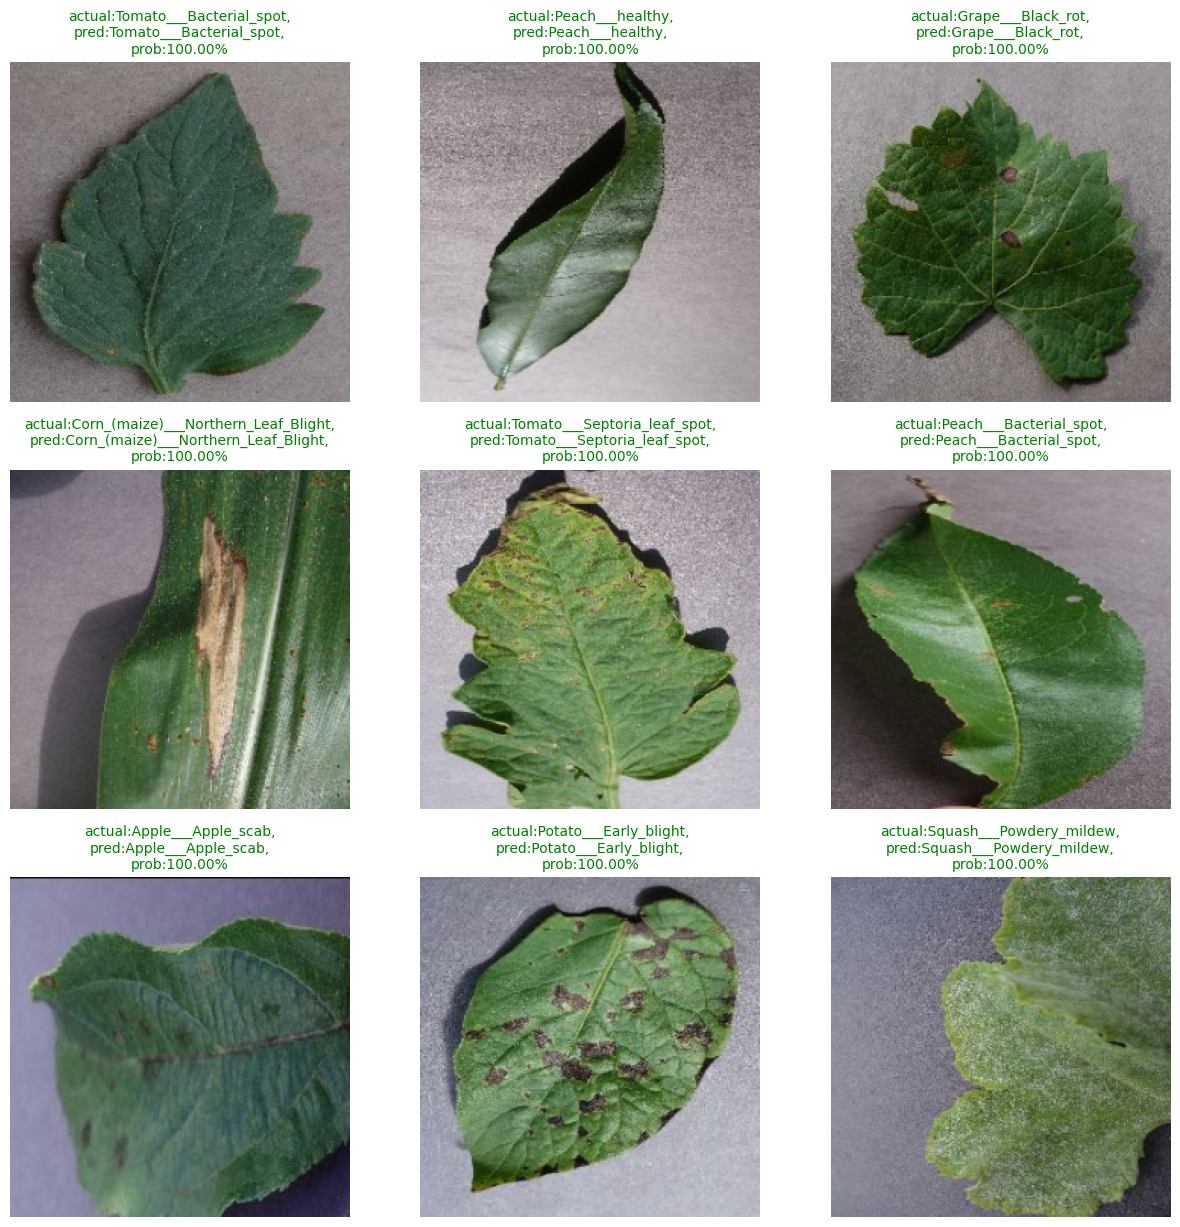

In [ ]:
plt.figure(figsize=(15,15))
for i in range(9):
  plt.subplot(3,3,i+1)
  random_image_predict(feature_model,test_dir)

1/1 [==============================] - 0s 27ms/step

1/1 [==============================] - 0s 26ms/step

1/1 [==============================] - 0s 26ms/step

1/1 [==============================] - 0s 28ms/step

1/1 [==============================] - 0s 26ms/step

1/1 [==============================] - 0s 26ms/step

1/1 [==============================] - 0s 29ms/step

1/1 [==============================] - 0s 26ms/step

1/1 [==============================] - 0s 27ms/step


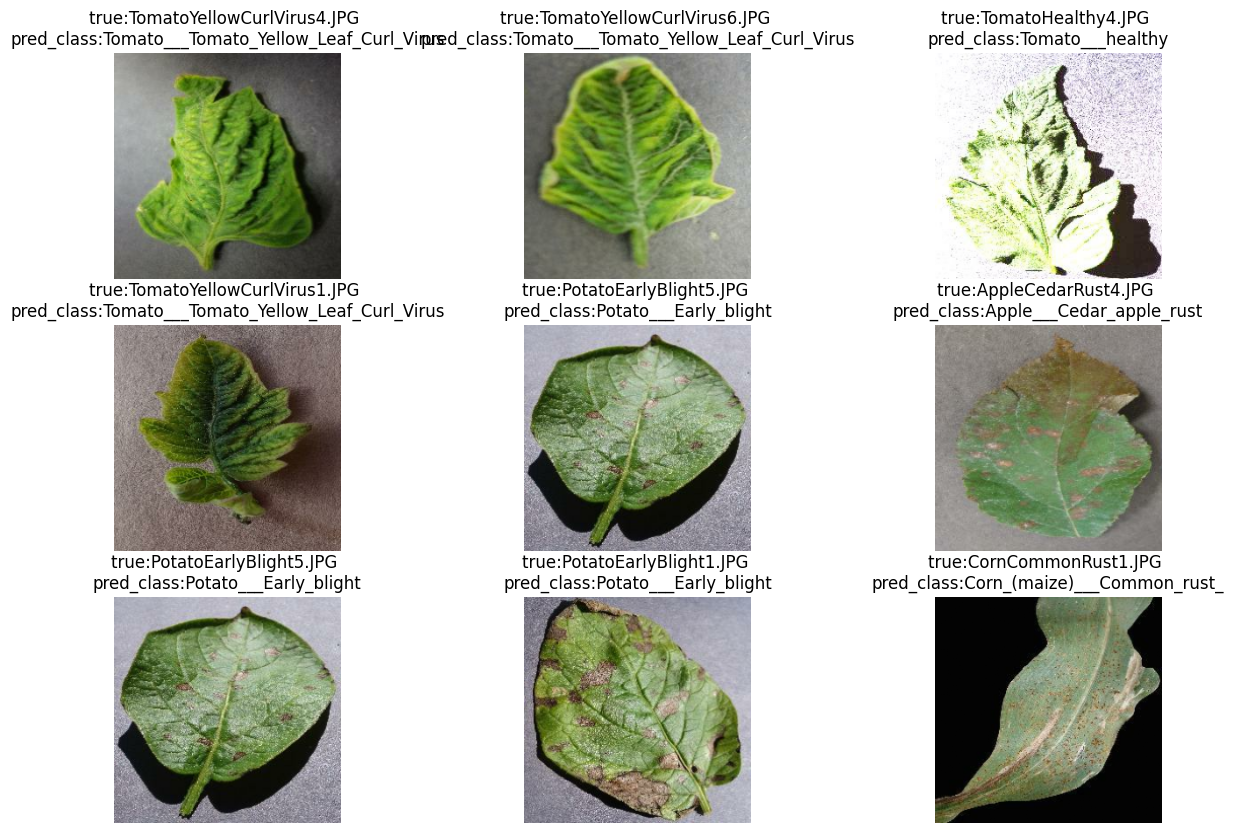

In [ ]:
data_dir='/content/new-plant-diseases-dataset/test/test'
plt.figure(figsize=(15,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  rn = random.choice(os.listdir(data_dir))
  image_path=os.path.join(data_dir,rn)
  img = load_prep(image_path)
  pred = feature_model.predict(tf.expand_dims(img,axis=0))
  pred_name = class_names[pred.argmax()]
  plt.imshow(img/255.)
  plt.title(f'true:{rn} \npred_class:{pred_name}')
  plt.axis(False)


## lets download some image on google

In [ ]:
def predict_img(img_path,model=feature_model,):
  img = load_prep(img_path)

  pred = model.predict(tf.expand_dims(img,axis=0))

  pred_name = class_names[pred.argmax()]

  plt.imshow(img/255.)
  plt.title(f'predicted_class : {pred_name}')
  plt.axis(False)

In [ ]:
!wget https://www.apsnet.org/edcenter/disandpath/fungalasco/pdlessons/Article%20Images/AppleScab03.jpg

--2023-04-01 20:05:10--  https://www.apsnet.org/edcenter/disandpath/fungalasco/pdlessons/Article%20Images/AppleScab03.jpg

Resolving www.apsnet.org (www.apsnet.org)... 3.216.53.172

Connecting to www.apsnet.org (www.apsnet.org)|3.216.53.172|:443... connected.

HTTP request sent, awaiting response... 200 OK

Length: 30646 (30K) [image/jpeg]

Saving to: ‘AppleScab03.jpg’



AppleScab03.jpg     100%[===================>]  29.93K   135KB/s    in 0.2s    



2023-04-01 20:05:12 (135 KB/s) - ‘AppleScab03.jpg’ saved [30646/30646]




1/1 [==============================] - 0s 36ms/step


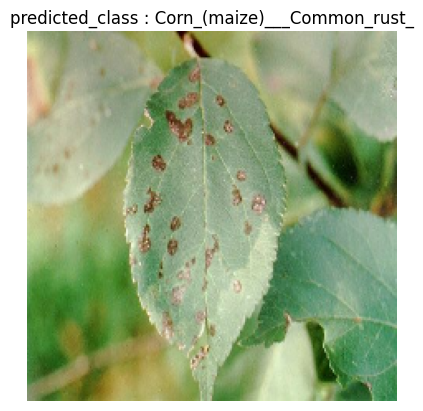

In [ ]:
predict_img('AppleScab03.jpg')

In [ ]:
!wget https://www.wiscontext.org/sites/default/files/styles/article_full_size_image/public/assets/images/corn-southernrust-summer.jpg

--2023-04-01 20:05:25--  https://www.wiscontext.org/sites/default/files/styles/article_full_size_image/public/assets/images/corn-southernrust-summer.jpg

Resolving www.wiscontext.org (www.wiscontext.org)... 107.22.178.157

Connecting to www.wiscontext.org (www.wiscontext.org)|107.22.178.157|:443... connected.

HTTP request sent, awaiting response... 200 OK

Length: 477131 (466K) [image/jpeg]

Saving to: ‘corn-southernrust-summer.jpg’



corn-southernrust-s 100%[===================>] 465.95K   527KB/s    in 0.9s    



2023-04-01 20:05:28 (527 KB/s) - ‘corn-southernrust-summer.jpg’ saved [477131/477131]




1/1 [==============================] - 0s 30ms/step


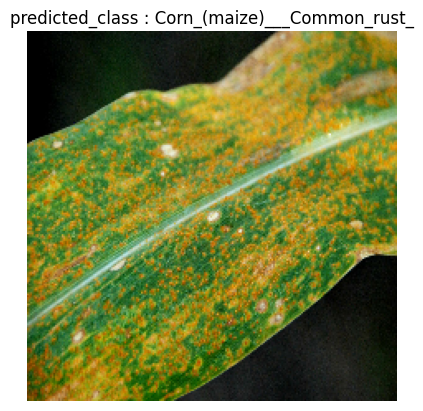

In [ ]:
predict_img('corn-southernrust-summer.jpg')

In [ ]:
!wget https://www.planetnatural.com/wp-content/uploads/2012/12/potato-blight.jpg

--2023-04-01 20:05:29--  https://www.planetnatural.com/wp-content/uploads/2012/12/potato-blight.jpg

Resolving www.planetnatural.com (www.planetnatural.com)... 104.18.1.2, 104.18.0.2, 2606:4700::6812:2, ...

Connecting to www.planetnatural.com (www.planetnatural.com)|104.18.1.2|:443... connected.

HTTP request sent, awaiting response... 200 OK

Length: 99069 (97K) [image/jpeg]

Saving to: ‘potato-blight.jpg’



potato-blight.jpg   100%[===================>]  96.75K  --.-KB/s    in 0.01s   



2023-04-01 20:05:29 (7.89 MB/s) - ‘potato-blight.jpg’ saved [99069/99069]




1/1 [==============================] - 0s 28ms/step


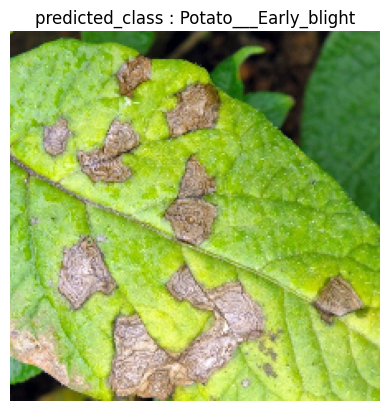

In [ ]:
predict_img('potato-blight.jpg')

In [ ]:
!wget https://content.peat-cloud.com/w400/black-rot-of-grape-grape-1575457334.jpg

--2023-04-01 20:10:12--  https://content.peat-cloud.com/w400/black-rot-of-grape-grape-1575457334.jpg

Resolving content.peat-cloud.com (content.peat-cloud.com)... 13.33.33.112, 13.33.33.122, 13.33.33.52, ...

Connecting to content.peat-cloud.com (content.peat-cloud.com)|13.33.33.112|:443... connected.

HTTP request sent, awaiting response... 200 OK

Length: 20361 (20K) [image/jpeg]

Saving to: ‘black-rot-of-grape-grape-1575457334.jpg’



black-rot-of-grape- 100%[===================>]  19.88K  --.-KB/s    in 0.1s    



2023-04-01 20:10:13 (145 KB/s) - ‘black-rot-of-grape-grape-1575457334.jpg’ saved [20361/20361]




1/1 [==============================] - 0s 85ms/step


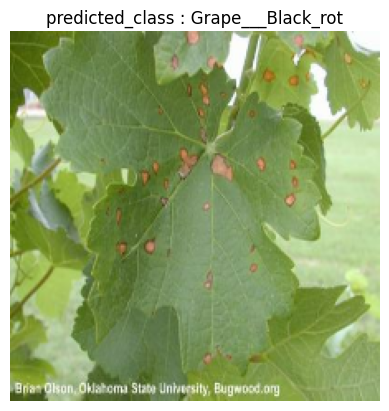

In [ ]:
predict_img('black-rot-of-grape-grape-1575457334.jpg')

In [ ]:
!wget https://cdn.shopify.com/s/files/1/1093/4358/files/Depositphotos_160089900_l-2015_large.jpg

--2023-04-01 20:12:35--  https://cdn.shopify.com/s/files/1/1093/4358/files/Depositphotos_160089900_l-2015_large.jpg

Resolving cdn.shopify.com (cdn.shopify.com)... 23.227.60.200

Connecting to cdn.shopify.com (cdn.shopify.com)|23.227.60.200|:443... connected.

HTTP request sent, awaiting response... 200 OK

Length: 28240 (28K) [image/jpeg]

Saving to: ‘Depositphotos_160089900_l-2015_large.jpg’



Depositphotos_16008 100%[===================>]  27.58K  --.-KB/s    in 0s      



2023-04-01 20:12:36 (119 MB/s) - ‘Depositphotos_160089900_l-2015_large.jpg’ saved [28240/28240]




1/1 [==============================] - 0s 107ms/step


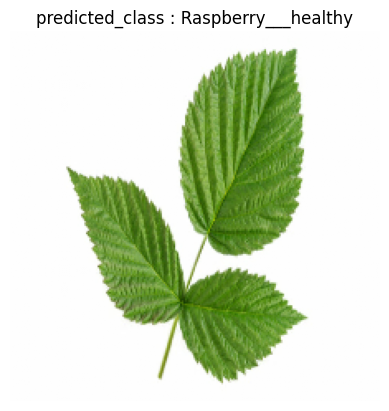

In [ ]:
predict_img('Depositphotos_160089900_l-2015_large.jpg')

In [ ]:
!wget https://www.rosbreed.org/sites/default/files/pm%20cherry%20leaf.jpg

--2023-04-01 20:14:45--  https://www.rosbreed.org/sites/default/files/pm%20cherry%20leaf.jpg

Resolving www.rosbreed.org (www.rosbreed.org)... 134.121.193.80

Connecting to www.rosbreed.org (www.rosbreed.org)|134.121.193.80|:443... connected.

HTTP request sent, awaiting response... 200 OK

Length: 246531 (241K) [image/jpeg]

Saving to: ‘pm cherry leaf.jpg’



pm cherry leaf.jpg  100%[===================>] 240.75K   346KB/s    in 0.7s    



2023-04-01 20:14:47 (346 KB/s) - ‘pm cherry leaf.jpg’ saved [246531/246531]




1/1 [==============================] - 0s 159ms/step


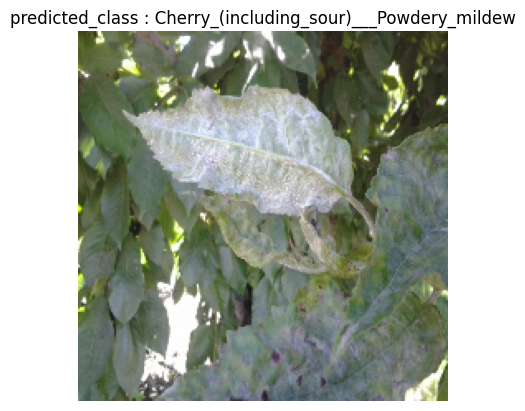

In [ ]:
predict_img('pm cherry leaf.jpg')